## Telco Customer Churn Case Study

###### Author: Ugochukwu Ibecheozor

### Problem Statement

##### In telco, customers are able to choose from multiple service providers and actively switch from one operator to another. It is a highly competitive market with an average annual churn rate of 10-25%. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. Hence, it is vital for us to understand which customers may churn so that the rentention strategies can be devised accordingly.

### Business Objective

##### In this project, our business objective is to analyse customer-level data of your firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn. Thus, our focus would be on
##### (i) Retaining high profitable customers.
##### (ii) Predicting which customers are at high risk of churn (in order to devise customer retention strategies accordingly).

### Begin Analysis

#### Install & Import Packages

In [1]:
pip install imbalanced-learn

  Using cached imbalanced_learn-0.12.3-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from sklearn import preprocessing, model_selection
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss,CondensedNearestNeighbour
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score, fbeta_score
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [4]:
df = pd.read_csv('telco_customer_churn.csv')

In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Methodology

#### Separate 20% of the data for testing 

In [5]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Churn'])
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [4]:
train_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4950-BDEUX,Male,0,No,No,35,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,No
1,7993-NQLJE,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,No
2,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,...,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,No
3,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.7,No
4,2903-YYTBW,Male,0,Yes,Yes,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6308-CQRBU,Female,0,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,No,Electronic check,109.25,7707.7,No
5630,2842-JTCCU,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),46.05,80.35,Yes
5631,6402-ZFPPI,Female,1,No,No,25,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,102.80,2660.2,Yes
5632,3594-BDSOA,Female,0,Yes,No,24,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.40,482.8,No


In [6]:
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


None

### Data Checking & Cleaning

##### 1. From the above, we observed that `TotalCharges` column is of object type. We will convert to numeric type.

In [6]:
train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'], errors='coerce')

##### 2. Let's check and handle for missing values 

In [7]:
train_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

We observed 8 Null values in `TotalCharges` column

Let's fill it with Mean Vaue

In [8]:
train_df['TotalCharges'].fillna((train_df['TotalCharges'].mean()), inplace=True)

##### 3. Check for duplicates

In [9]:
train_df.duplicated().sum()

0

##### 4. Replacing 'No internet service' and 'No phone service' with 'No'

In [10]:
train_df.replace(['No internet service','No phone service'], 'No', inplace=True)

### Exploratory Data Analysis (EDA)

#### Distribution of target column:

Churn
No     4139
Yes    1495
Name: count, dtype: int64


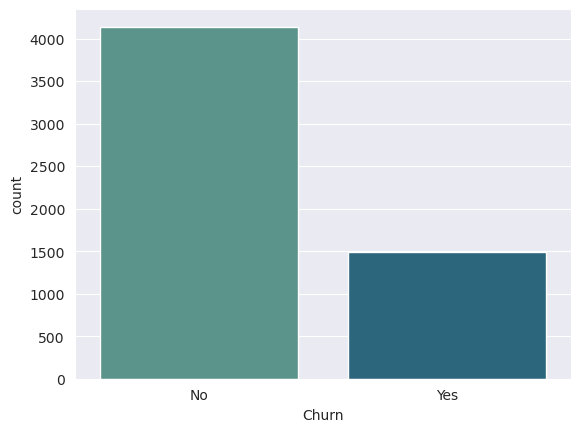

In [12]:
print(train_df['Churn'].value_counts())
_ = sns.countplot(x='Churn', data=train_df, palette='crest')

# save the plot
#plt.savefig('images/churn_distribution.png', dpi=300, bbox_inches='tight')

#### Churn distribution with respect to Gender - Male (M), Female (F)

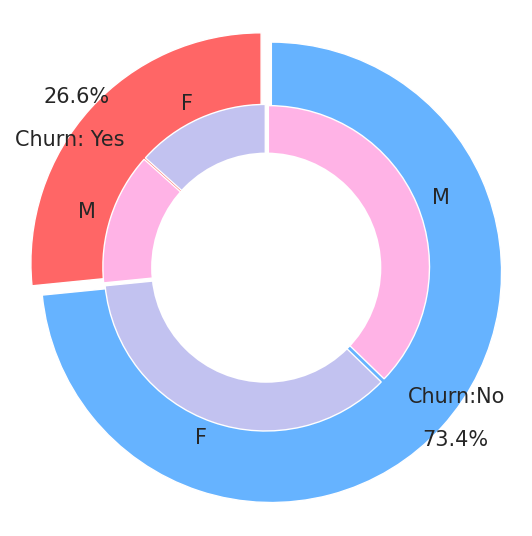

In [17]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout(pad=3.0)

# save the plot
# plt.savefig('images/churn_distribution_by_gender.png', dpi=300, bbox_inches='tight')

# show plot 
plt.show()

#### Categorical features count plot 

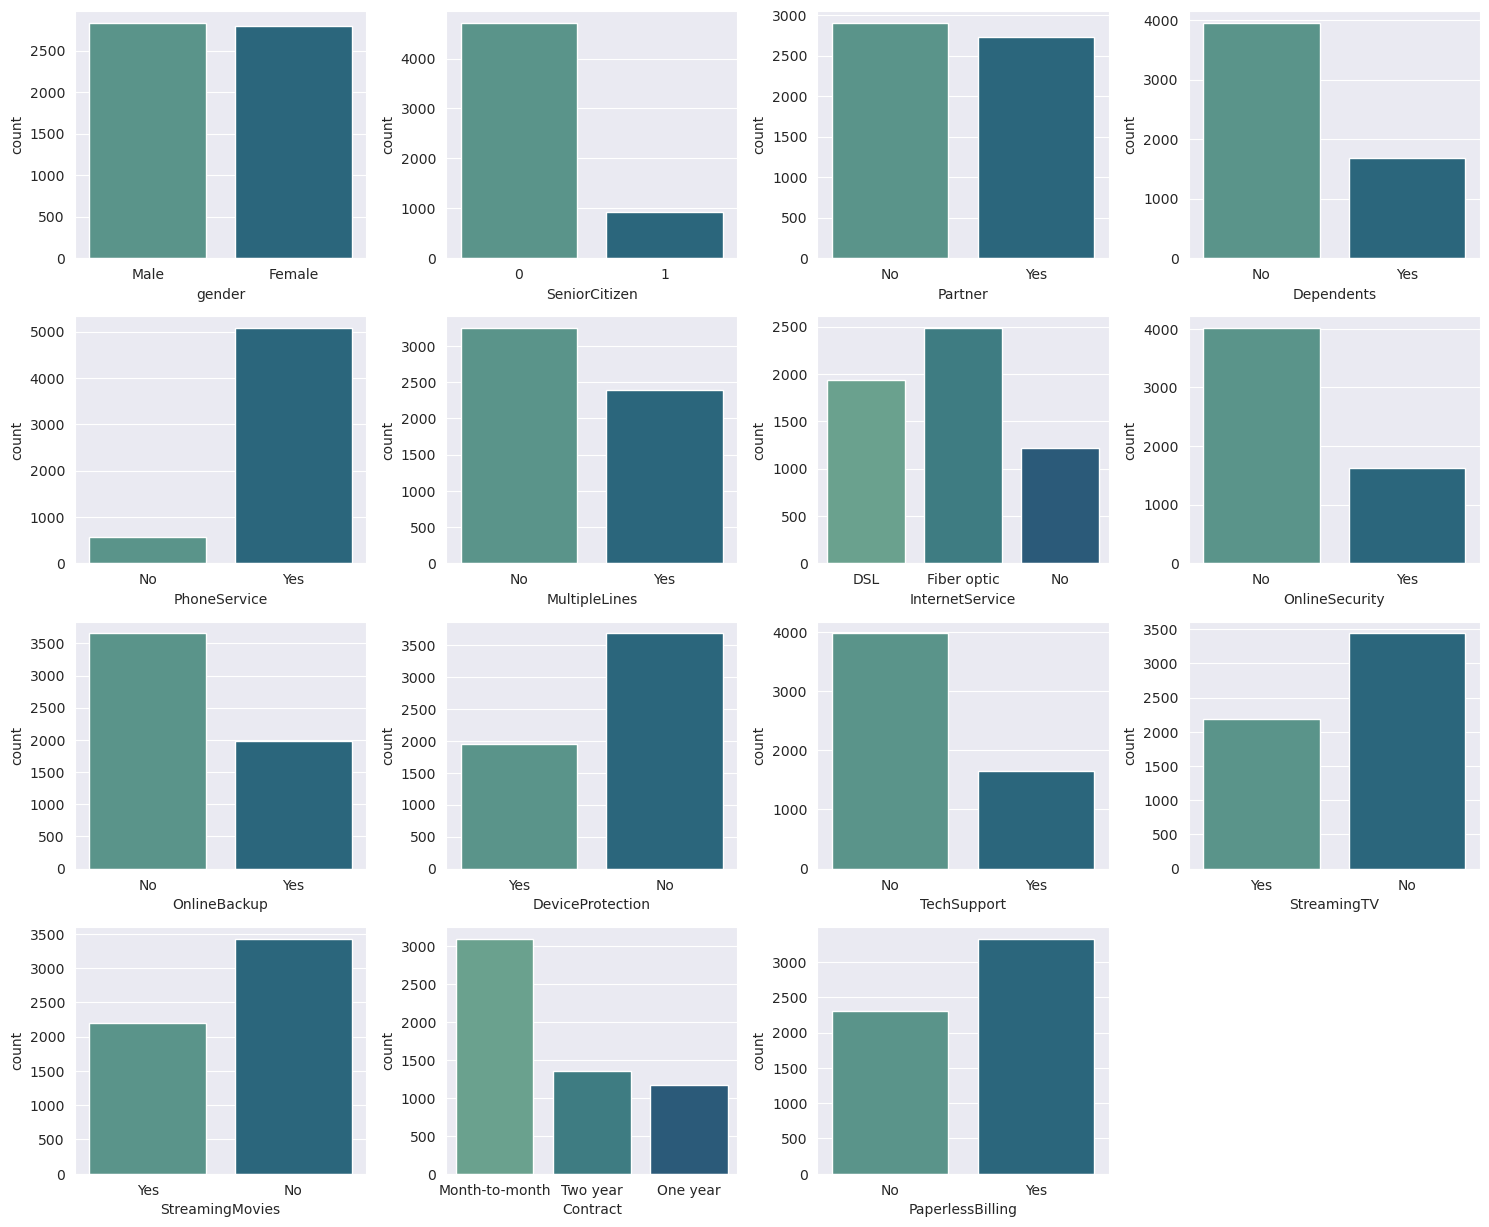

In [10]:
cat_cols = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
              'Contract', 'PaperlessBilling']

plt.figure(figsize=(15, 15))
for n, variable in enumerate(cat_cols):
    ax = plt.subplot(5, 4, n + 1)
    g=sns.countplot(data=train_df, x=train_df[variable], ax=ax, palette='crest')

plt.tight_layout()
#plt.savefig('images/categorical_features_count_others.png', dpi=300, bbox_inches='tight')
plt.show()

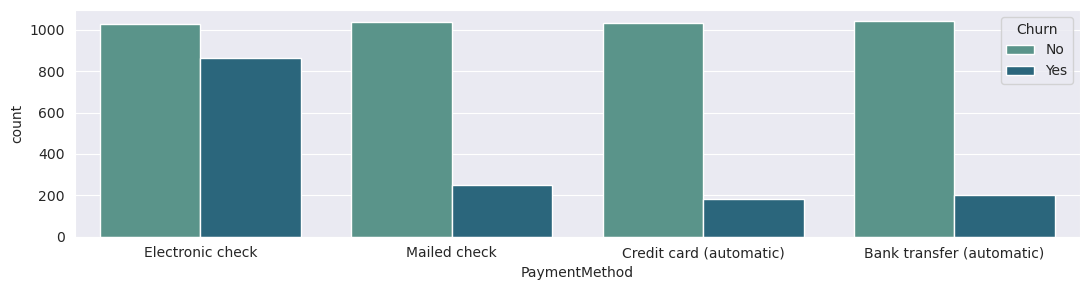

In [19]:
plt.figure(figsize=(11,3))
_ = sns.countplot(x= 'PaymentMethod', hue='Churn', data=train_df, palette='crest')

plt.tight_layout()
# plt.savefig('images/categorical_features_payment_methods.png', dpi=300, bbox_inches='tight')
plt.show() 

- The gender count plot shows an equal distribution of males and females in the dataset
- Some features have 'No' and 'No Internet Service' or 'No Phone Service' as a separate category which don't give new info and could all be considered as 'No' label

#### Distribution of monthly charges by churn

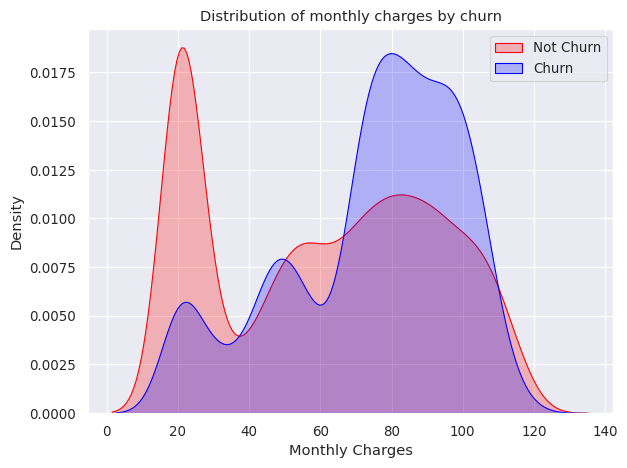

In [20]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

plt.tight_layout()
#plt.savefig('images/distr_monthly_charges_by_churn.png', dpi=300, bbox_inches='tight') 

The above implies that 
- Customers with higher monthly charges are more likely to churn

#### Distribution of tenure by churn

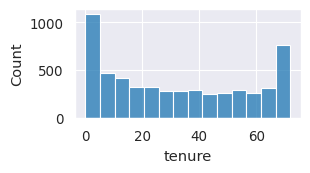

In [101]:
plt.subplot(3, 2, 2)
_ = sns.histplot(x='tenure', data=train_df)

#plt.tight_layout()
#plt.savefig('images/distr_tenure_by_churn.png', dpi=300, bbox_inches='tight')

* Histogram shows that new customers are more likely to churn.
* This indicates that customer retention efforts might be most effective early in the customer lifecycle.

#### Correlation matrix

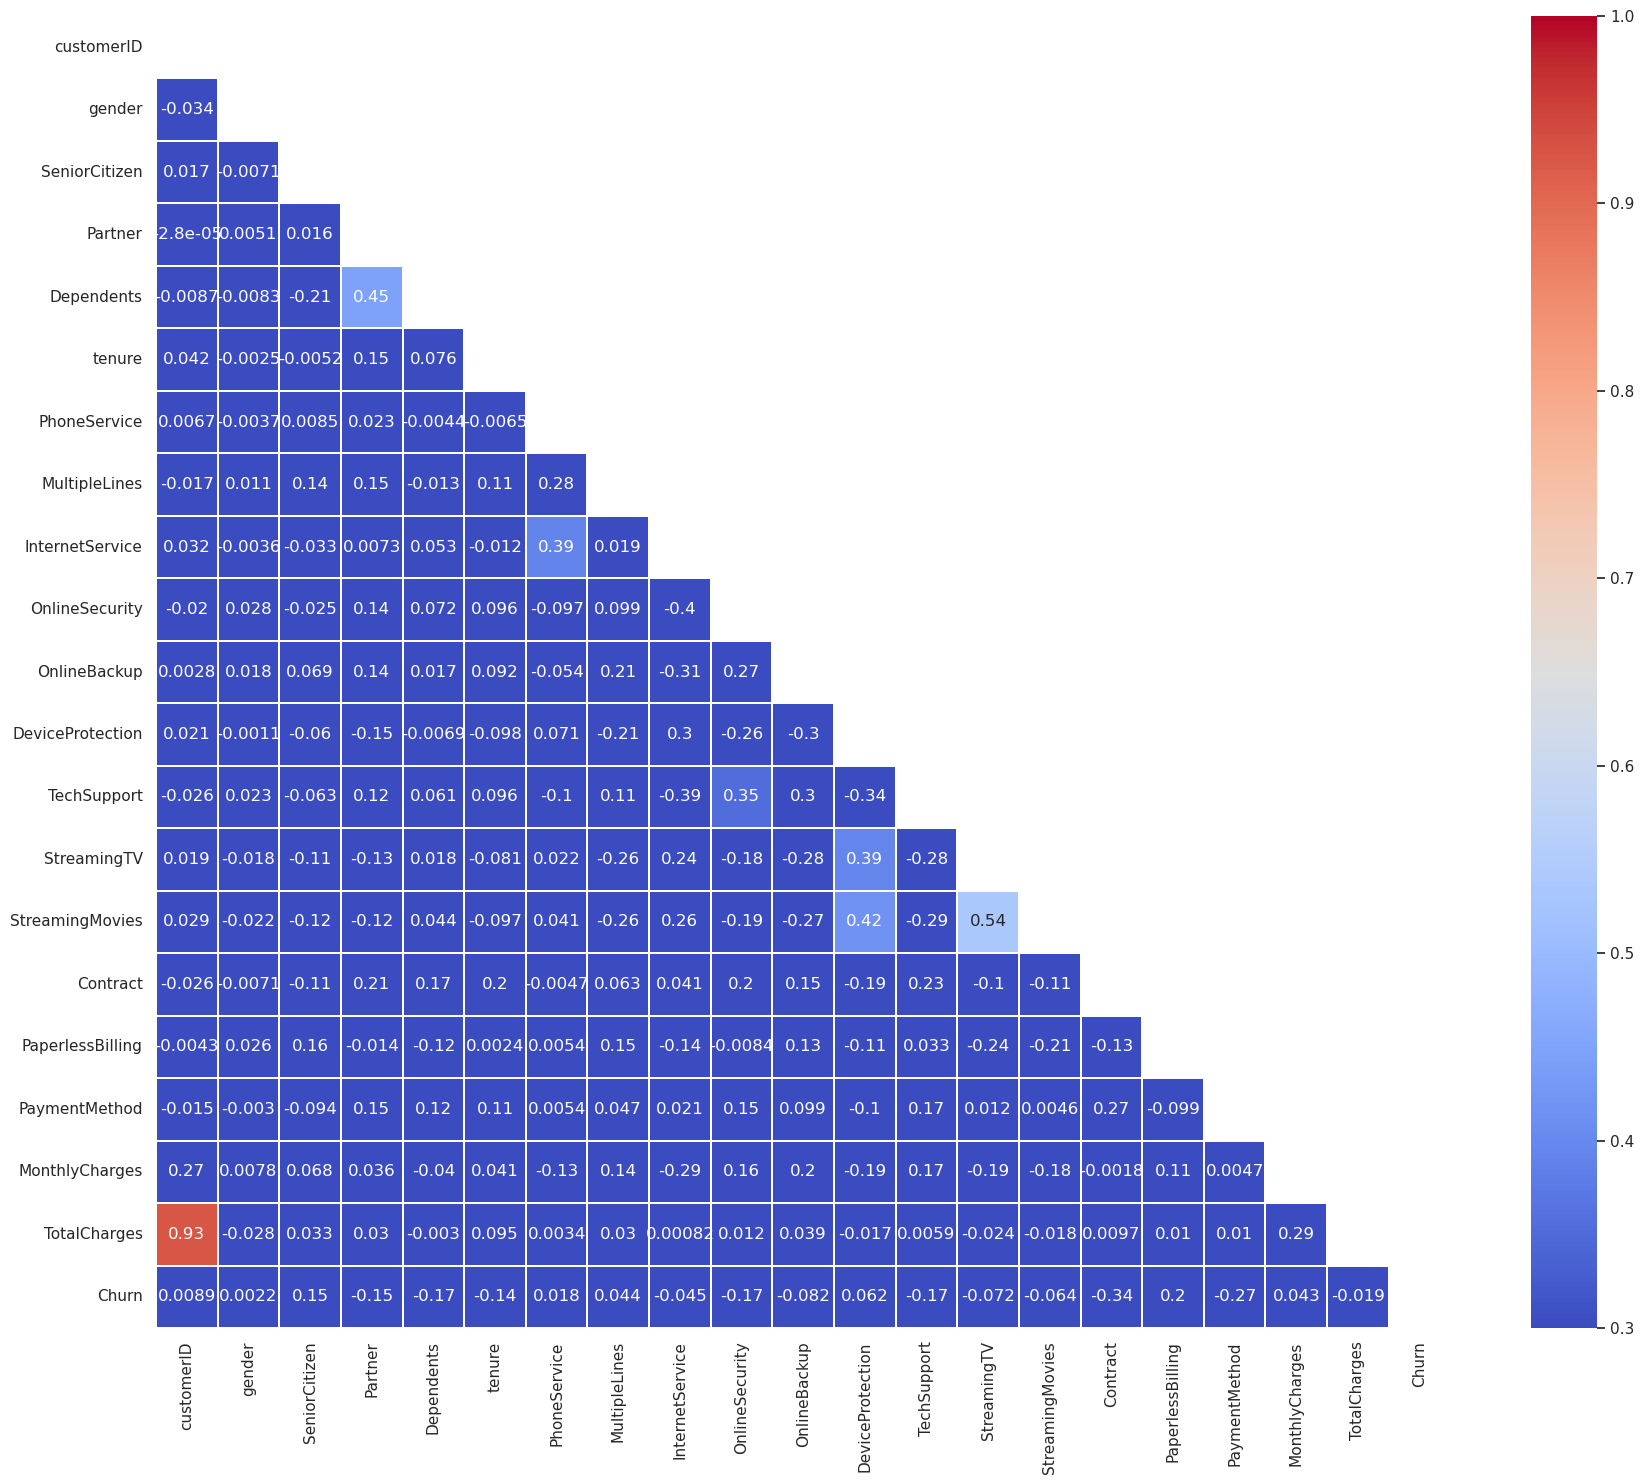

In [172]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
plt.figure(figsize=(18, 15))

corr = train_df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=0.3, vmax=1)

#plt.tight_layout()
#plt.savefig('images/correlation_matrix.png', dpi=300, bbox_inches='tight')

### Encoding Categorical Features

* One-Hot encoding all categorical features
* Encode by mapping target feature

In [11]:
# One-hot encoding
cat_cols = ['gender', 'InternetService', 'Contract', 'PaymentMethod','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines', 'OnlineSecurity', 
          'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

train_df = pd.concat([train_df, pd.get_dummies(train_df[cat_cols])], axis='columns')
train_df = train_df.drop(columns=cat_cols)

# mapping 
train_df['Churn'] = np.where(train_df['Churn'] == 'Yes', 1, 0)  # yes=1, No=0

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               5634 non-null   object 
 1   SeniorCitizen                            5634 non-null   int64  
 2   tenure                                   5634 non-null   int64  
 3   MonthlyCharges                           5634 non-null   float64
 4   TotalCharges                             5634 non-null   float64
 5   Churn                                    5634 non-null   int64  
 6   gender_Female                            5634 non-null   bool   
 7   gender_Male                              5634 non-null   bool   
 8   InternetService_DSL                      5634 non-null   bool   
 9   InternetService_Fiber optic              5634 non-null   bool   
 10  InternetService_No                       5634 no

### Feature Engineering

##### 1. Binning 'tenure' feature into 6 ranges (a.k.a Tenure Bracketing):

In [13]:
condition = [((train_df.tenure >= 0)&(train_df.tenure <= 12)), ((train_df.tenure > 12)&(train_df.tenure <= 24)), 
             ((train_df.tenure > 24)&(train_df.tenure <= 36)),((train_df.tenure > 36)&(train_df.tenure <= 48)),
             ((train_df.tenure > 48)&(train_df.tenure <= 60)), (train_df.tenure > 60)]


choice = [0, 1, 2, 3, 4, 5] #choice = ['0-1year','1-2years', '2-3years', '3-4years','4-5years','more than 5 years']
train_df['tenure_range'] = np.select(condition, choice)

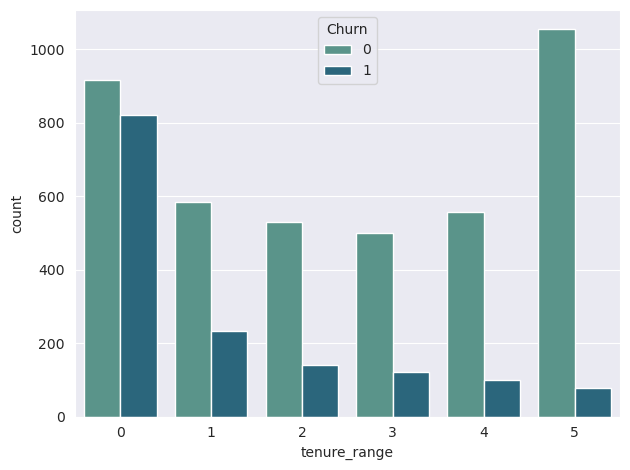

In [67]:
_ = sns.countplot(x= 'tenure_range', hue='Churn', data=train_df, palette='crest', order=choice)

plt.tight_layout()
#plt.savefig('images/distr_tenure_range_by_churn.png', dpi=300, bbox_inches='tight')

* We noticed that customers who stay longer are more loyal to the company, and a very small number leave after staying more than 4 years. On the other hand, the customer churn rate is very high during the first year.

##### 2. High Monthly Charges: Binary indicator for high-paying customers

In [42]:
#high_charge_threshold = train_df['MonthlyCharges'].quantile(0.75)  # 75th percentile
#train_df['high_monthly_charge'] = (train_df['MonthlyCharges'] > high_charge_threshold).astype(int)

In [43]:
#plt.figure(figsize=(6, 4))
#sns.countplot(x='high_monthly_charge', hue='Churn', data=train_df)

* Binary variable to indicate if the customer is in a "high monthly charge" bracket (above a threshold), which could indicate they are more likely to churn.


##### 3. Contract Length Indicator: Binary for month-to-month contract vs longer contracts

In [14]:
train_df['short_contract'] = (train_df['Contract_Month-to-month'] == 1).astype(int)

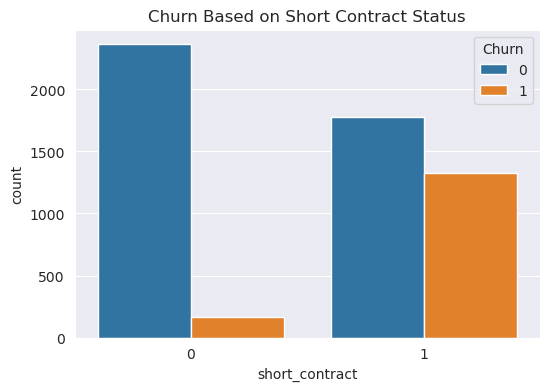

In [69]:
plt.figure(figsize=(6, 4))
sns.countplot(x='short_contract', hue='Churn', data=train_df)
plt.title('Churn Based on Short Contract Status')
plt.show()

- This binary feature shows if the customer is on a month-to-month contract versus a longer contract (like one year), as month-to-month customers might churn more.

##### 4. Electronic Check Feature: Binary for automatic electronic check payment methods

In [15]:
train_df['electronic_check'] = train_df['PaymentMethod_Electronic check']

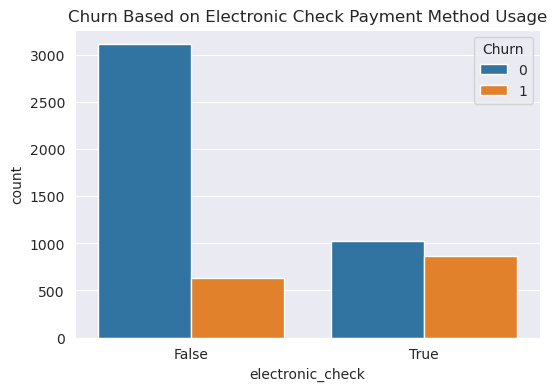

In [71]:
plt.figure(figsize=(6, 4))
sns.countplot(x='electronic_check', hue='Churn', data=train_df)
plt.title('Churn Based on Electronic Check Payment Method Usage')
plt.show()

-  Whether a customer is using automatic bank transfer might reduce churn risk, as it's less effort to continue the service.

### Handling data imbalance

##### As we have learned in class, data imbalance affects machine learning models by tending only to predict the majority class and ignoring the minority class. Hence, the minority class is significantly misclassified compared to the majority class. Thus, we use techniques to balance class distribution in the data.

In [16]:
X_train = train_df.drop(columns=['customerID', 'Churn'])
y_train = train_df['Churn']

In [17]:
sm = SMOTE(random_state = 0, sampling_strategy = 'minority', k_neighbors= 5)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

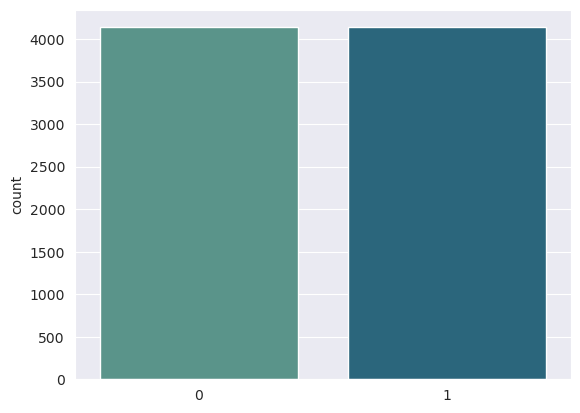

In [74]:
_ = sns.countplot(x=y_train, palette='crest')

plt.savefig('images/handled_data_imbalance.png', dpi=300, bbox_inches='tight')

### Preprocessing Function On Test Data Set

##### To handle any expected missing values in the test set, we created a function to replicate all we did on the training data set and also included a condition to map the mean value of its column in the train set.

In [18]:
def test_prep (test_df):
    ### Data cleaning
    #Converting 'TotalCharges' column to numeric
    test_df['TotalCharges'] = pd.to_numeric(test_df['TotalCharges'], errors='coerce')
    
    #Replacing 'No internet service' and 'No phone service' with 'No'
    test_df.replace(['No internet service', 'No phone service'], 'No', inplace=True)
    
    # if there is null values in the continuous features --> fill with the mean of columns in the testing set (mapping)
    for col in test_df.columns:
        if test_df[col].isna().sum() > 0:
            test_df[col] = test_df[col].fillna(train_df[col].map(np.mean))
            
    ### Categorical features encoding 
    test_df = pd.concat([test_df, pd.get_dummies(test_df[cat_cols])], axis='columns')
    test_df = test_df.drop(columns=cat_cols)
    
    test_df['Churn'] = np.where(test_df['Churn'] == 'Yes', 1, 0)
            
    ### Feature engineering
    #1. Binning 'tenure' feature into 6 ranges
    condition = [((test_df.tenure >= 0)&(test_df.tenure <= 12)), ((test_df.tenure > 12)&(test_df.tenure <= 24)), 
                 ((test_df.tenure > 24)&(test_df.tenure <= 36)),((test_df.tenure > 36)&(test_df.tenure <= 48)),
                 ((test_df.tenure > 48)&(test_df.tenure <= 60)), (test_df.tenure > 60)]
    #choice = ['0-1year','1-2years', '2-3years', '3-4years','4-5years','more than 5 years']
    choice = [0,1, 2, 3, 4, 5]
    test_df['tenure_range'] = np.select(condition, choice)

    #2. High Monthly Charges: Binary indicator for high-paying customers
    #high_charge_threshold = test_df['MonthlyCharges'].quantile(0.75)  # 75th percentile
    #test_df['high_monthly_charge'] = (test_df['MonthlyCharges'] > high_charge_threshold).astype(int)

    #3. Contract Length Indicator: Binary for month-to-month contract vs longer contracts
    test_df['short_contract'] = (test_df['Contract_Month-to-month'] == 1).astype(int)

    #4. Electronic Check Feature: Binary for automatic electronic payment methods
    test_df['electronic_check'] = test_df['PaymentMethod_Electronic check']
    
    return test_df

In [19]:
test_df = test_prep(test_df)

In [20]:
test_df

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure_range,short_contract,electronic_check
0,4376-KFVRS,0,72,114.05,8468.20,0,False,True,False,True,...,True,False,True,False,True,False,True,5,0,False
1,2754-SDJRD,1,8,100.15,908.55,0,True,False,False,True,...,False,False,True,False,True,False,True,0,1,False
2,9917-KWRBE,0,41,78.35,3211.20,0,True,False,True,False,...,True,True,False,False,True,True,False,3,0,False
3,0365-GXEZS,0,18,78.20,1468.75,0,False,True,False,True,...,True,False,True,True,False,True,False,1,1,True
4,9385-NXKDA,0,72,82.65,5919.35,0,True,False,True,False,...,True,True,False,False,True,False,True,5,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,5204-HMGYF,0,49,87.20,4345.00,0,True,False,True,False,...,True,False,True,False,True,False,True,4,0,False
1405,9950-MTGYX,0,28,20.30,487.95,0,False,True,False,False,...,False,True,False,True,False,True,False,2,0,False
1406,3675-EQOZA,0,5,20.65,93.55,0,False,True,False,False,...,False,True,False,True,False,True,False,0,1,False
1407,3646-ITDGM,0,56,19.70,1051.90,0,True,False,False,False,...,False,True,False,True,False,True,False,4,0,False


In [21]:
X_test = test_df.drop(columns=['customerID', 'Churn'])
y_test = test_df['Churn']

### Model Training

#### 1. **Evaluating Multiple Models: Based on AUC-ROC**

In [22]:
# Initialize models
models = {
    "Lasso Regression": Lasso(alpha=0.01),
    "Ridge Regression": Ridge(alpha=0.01),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boost Classifier": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Neural Network": MLPClassifier(random_state=42, max_iter=300)
}

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to fit, predict and evaluate model
def evaluate_model(model, X_train, y_train, X_test, y_test, is_regression=False):
    if is_regression:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred = (y_pred > 0.5).astype(int)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    auc_roc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return auc_roc, accuracy

# Evaluate all models and store results
results = []

for name, model in models.items():
    is_regression = name in ["Lasso Regression", "Ridge Regression"]
    X_train_data = X_train_scaled if is_regression else X_train
    X_test_data = X_test_scaled if is_regression else X_test
    
    auc_roc, accuracy = evaluate_model(model, X_train_data, y_train, X_test_data, y_test, is_regression)
    
    # Generate a simple comment based on performance
    if auc_roc > 0.8 and accuracy > 0.8:
        comment = "Strong performance"
    elif auc_roc > 0.7 and accuracy > 0.7:
        comment = "Moderate performance"
    else:
        comment = "Needs improvement"
    
    results.append((name, auc_roc, accuracy, comment))

In [24]:
results_df = pd.DataFrame(results, columns=["Algorithm", "AUC-ROC", "Accuracy", "Comment"])

# Display the results
results_df

,Algorithm,AUC-ROC,Accuracy,Comment
0,Lasso Regression,0.733371,0.765082,Moderate performance
1,Ridge Regression,0.738550,0.792761,Moderate performance
2,Decision Tree,0.673435,0.735983,Needs improvement
3,Random Forest,0.697298,0.778566,Needs improvement
4,Gradient Boost Classifier,0.727226,0.789922,Moderate performance
5,Logistic Regression,0.713879,0.761533,Moderate performance
6,Neural Network,0.630054,0.495387,Needs improvement


#### **Evaluating Based On: Precision, Recall, F1 Score, F2 Score**

In [25]:
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]], 
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results

#### Logistic regression

In [26]:
log_classifier = LogisticRegression(random_state=42)
log_classifier.fit(X_train, y_train)

log_y_pred = log_classifier.predict(X_test)

In [27]:
lr = model_evaluation(y_test, log_y_pred, "Logistic Regression")

In [56]:
lr

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,Logistic Regression,0.764372,0.550971,0.606952,0.577608,0.594864


#### Decision tree

In [28]:
decision_tree = DecisionTreeClassifier(criterion="entropy", random_state=0)
decision_tree.fit(X_train, y_train)

decision_tree_y_pred = decision_tree.predict(X_test)

In [29]:
dt = model_evaluation(y_test, decision_tree_y_pred, "Decision Tree")

In [58]:
dt

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,Decision Tree,0.735273,0.501229,0.545455,0.522407,0.535996


#### Random Forest

In [30]:
random_f = RandomForestClassifier(n_estimators=72, criterion="entropy", random_state=0)
random_f.fit(X_train, y_train)

random_f_pred = random_f.predict(X_test)

In [31]:
rf = model_evaluation(y_test, random_f_pred, "Random Forest")

In [62]:
rf

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,Random Forest,0.779276,0.597523,0.516043,0.553802,0.530511


#### Gradient Boost

In [32]:
# Gradient Boost
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

gb_y_pred = gb_classifier.predict(X_test)

In [33]:
gb = model_evaluation(y_test, gb_y_pred, "Gradient Boost")

In [65]:
gb

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,Gradient Boost,0.793471,0.613079,0.601604,0.607287,0.603865


##### Combine them into a single dataframe

In [34]:
eval_ = pd.concat([lr, dt, rf, gb], axis=0).sort_values(["Precision", "Recall", "F2 Score"], ascending=False).reset_index(drop=True)

In [35]:
eval_

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,Random Forest,0.787083,0.613497,0.534759,0.571429,0.548847
1,Gradient Boost,0.789922,0.606557,0.593583,0.600000,0.596133
2,Logistic Regression,0.761533,0.545238,0.612299,0.576826,0.597599
3,Decision Tree,0.735983,0.502475,0.542781,0.521851,0.534211


### HyperParameter Tuning

#### Using Grid SearchCV (As used in previous case we did)

##### **Gradient Boost**

In [38]:
gb_param_grid = {'loss': ['log_loss', 'exponential'], 
                 'n_estimators': [10, 100, 200, 300],
                 'max_depth': [1, 2, 4, 6, 8]}

grid_search_gb = GridSearchCV(gb_classifier, param_grid = gb_param_grid, cv = 10, scoring = "roc_auc", n_jobs = 6, verbose = 1)

grid_search_gb.fit(X_train,y_train)

gb_estimator = grid_search_gb.best_estimator_

Fitting 10 folds for each of 40 candidates, totalling 400 fits


In [39]:
print(gb_estimator)
print(grid_search_gb.best_score_)

GradientBoostingClassifier(loss='exponential', max_depth=6)
0.9458206741484272


In [ ]:
best_gb_fitted = grid_search_gb.best_estimator_.fit(X_train, y_train)

test_labels_gb2 = best_gb_fitted.predict_proba(np.array(X_test.values))[:,1]

roc_auc_score(y_test, test_labels_gb2, average = 'macro', sample_weight = None)

### Extras

#### Save Winning Model

In [37]:
import pickle

# Assuming `trained_model` is your final model
with open('models/gb_boost_model.pkl', 'wb') as file:
    pickle.dump(gb_classifier, file)

In [42]:
with open('models/standard_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

##### We developed a web interface to show the model performance in real-time using a depkoyed web form. So the saved winning model was loaded up for this use case.